# LOAD colocalisations in datasets

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import pyproj

# from rasterio.transform import Affine

import matplotlib.pyplot as plt
import matplotlib.colors as cl

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.geodesic as cgeo

crs = ccrs.PlateCarree()
import cmocean.cm as cm

# from xgcm import Grid
from xhistogram.xarray import histogram
import warnings

warnings.filterwarnings("ignore")

import os
from glob import glob

In [2]:
if True:
    from dask.distributed import Client
    from dask_jobqueue import PBSCluster

    cluster = PBSCluster(cores=7, processes=7, walltime="04:00:00")
    w = cluster.scale(jobs=1)
else:
    from dask.distributed import Client, LocalCluster

    #
    cluster = LocalCluster()

client = Client(cluster)
client

Connection method: Cluster object,Cluster type: dask_jobqueue.PBSCluster
Dashboard: http://10.148.1.56:8787/status,
Dashboard: http://10.148.1.56:8787/status,Workers: 0
Total threads: 0,Total memory: 0 B
Comm: tcp://10.148.1.56:54384,Workers: 0
Dashboard: http://10.148.1.56:8787/status,Total threads: 0
Started: Just now,Total memory: 0 B


# NEW

In [4]:
colloc_path = {
    2008: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2008/",
    2009: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2009/",
    2010: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2010/",
    2011: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2011/",
    2012: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2012/",
    2013: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2013/",
    2014: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2014/",
    2015: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2015/",
    2016: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2016/",
    2017: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2017/",
    2018: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/",
    2019: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2019/",
    2020: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2020/",
}

In [29]:
all_files = []
for l in colloc_path :
    files = glob(os.path.join(colloc_path[l], '*'))
    all_files += files
    print(np.unique(['_'.join(f.split('_')[-3:]) for f in all_files]))
    print('\n\n\n')

['CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc']




['CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc']




['CMEMS-L3-SLA-Cryosat-2__argos.nc' 'CMEMS-L3-SLA-Cryosat-2__gps.nc'
 'CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc']




['CMEMS-L3-SLA-Cryosat-2__argos.nc' 'CMEMS-L3-SLA-Cryosat-2__gps.nc'
 'CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc']




['CMEMS-L3-SLA-Cryosat-2__argos.nc' 'CMEMS-L3-SLA-Cryosat-2__gps.nc'
 'CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc']




['CMEMS-L3-SLA-Cryosat-2__argos.nc' 'CMEMS-L3-SLA-Cryosat-2__gps.nc'
 'CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc'
 'CMEMS-L3-SLA-SARAL__argos.nc' 'CMEMS-L3-SLA-SARAL__gps.nc']




['CMEMS-L3-SLA-Cryosat-2__argos.nc' 'CMEMS-L3-SLA-Cryosat-2__gps.nc'
 'CMEMS-L3-SLA-Jason-2__argos.nc' 'CMEMS-L3-SLA-Jason-2__gps.nc'
 'CMEMS-L3-SLA-SARAL__argos.nc' 'CMEMS-L3-SLA-SARAL__gps.nc']




['CMEMS-L3-SLA-Cryosat-2__argos.nc' 'CMEMS-

In [22]:
files = [f.split('_')[-3:] for f in all_files]

In [21]:
for af in all_files:
    ds = xr.open_dataset(af)
    print((ds.time.max()-ds.time.min())/pd.Timedelta('1d'))

<xarray.DataArray 'time' ()>
array(31.)
<xarray.DataArray 'time' ()>
array(11.95833333)
<xarray.DataArray 'time' ()>
array(28.83333333)
<xarray.DataArray 'time' ()>
array(30.16666667)
<xarray.DataArray 'time' ()>
array(12.79166667)
<xarray.DataArray 'time' ()>
array(29.)
<xarray.DataArray 'time' ()>
array(29.)
<xarray.DataArray 'time' ()>
array(26.70833333)
<xarray.DataArray 'time' ()>
array(28.125)
<xarray.DataArray 'time' ()>
array(29.04166667)
<xarray.DataArray 'time' ()>
array(30.95833333)
<xarray.DataArray 'time' ()>
array(30.)
<xarray.DataArray 'time' ()>
array(28.375)
<xarray.DataArray 'time' ()>
array(30.)
<xarray.DataArray 'time' ()>
array(28.125)
<xarray.DataArray 'time' ()>
array(30.04166667)
<xarray.DataArray 'time' ()>
array(30.)
<xarray.DataArray 'time' ()>
array(23.79166667)
<xarray.DataArray 'time' ()>
array(30.)
<xarray.DataArray 'time' ()>
array(29.)
<xarray.DataArray 'time' ()>
array(26.66666667)
<xarray.DataArray 'time' ()>
array(27.79166667)
<xarray.DataArray 'time


KeyboardInterrupt



In [30]:
def load_collocalisations(source, satellite=None, product_type=None, drifter=None):
    """Load collocalisations altimetry / GDP data

    Parameters
    ----------
    source : str, int
        Data source, e.g. 2016, 2018
    satellite : str
        type of satellite we want to select among "SARAL" or "Sentinel"  (if we want to)
    drifter : str
        type of drifter we want to select among "gps" or "argos" (if we want to)

    Return
    ------
    list of .nc filess

    """
    files = sorted(glob(os.path.join(colloc_path[source], "*.nc")))
    if product_type is not None:
        files = [f for f in files if product_type in f]

    if satellite is not None:
        files = [f for f in files if satellite in f]

    if drifter is not None:
        files = [f for f in files if drifter in f]

    return files

In [5]:
labels_new = [
    "gps_SARAL_2018",
    "gps_Sentinel_2018",
    "argos_SARAL_2018",
    "argos_Sentinel_2018",
]
nc_files_new = {
    l: load_collocalisations(
        int(l.split("_")[-1]),
        drifter=l.split("_")[0],
        product_type=l.split("_")[1],
        satellite=l.split("_")[2],
    )
    for l in labels_new
}
nc_files_new

{'gps_SARAL_2018': [],
 'gps_Sentinel_2018': ['/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180101_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180201_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180301_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180401_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180501_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180601_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/20180701_CMEMS-L3-SLA-Sentinel-3_A__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb_v2/2018/2

# OLD

In [6]:
colloc_path = {
    2016: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/mdb/2016/",
    2018: "/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/",
}

In [7]:
def load_collocalisations(source, satellite=None, product_type=None, drifter=None):
    """Load collocalisations altimetry / GDP data

    Parameters
    ----------
    source : str, int
        Data source, e.g. 2016, 2018
    satellite : str
        type of satellite we want to select among "SARAL" or "Sentinel"  (if we want to)
    drifter : str
        type of drifter we want to select among "gps" or "argos" (if we want to)

    Return
    ------
    list of .nc filess

    """
    files = sorted(glob(os.path.join(colloc_path[source], "*.nc")))

    if product_type is not None:
        files = [f for f in files if satellite in f]
    if satellite is not None:
        files = [f for f in files if product_type in f]
    if drifter is not None:
        files = [f for f in files if drifter in f]

    return files

In [8]:
labels = [
    "gps_SASSA_SARAL_2018",
    "gps_SASSA_Sentinel_2018",
    "argos_SASSA_SARAL_2018",
    "argos_SASSA_Sentinel_2018",
    "argos_SASSA_Sentinel_2016",
    "argos_PEACHI_Sentinel_2018",
    "gps_PEACHI_Sentinel_2018",
]
nc_files = {
    l: load_collocalisations(
        int(l.split("_")[-1]),
        drifter=l.split("_")[0],
        product_type=l.split("_")[1],
        satellite=l.split("_")[2],
    )
    for l in labels
}
nc_files

{'gps_SASSA_SARAL_2018': ['/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180101_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180201_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180301_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180401_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180501_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180601_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180701_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/felyx/drifters/mdb/2018/20180801_SASSA-L3-SLA-SARAL__gps.nc',
  '/home/datawork-cersat-public/cache/users/jfpiolle/fel

# Comparison

In [9]:
ds_new = xr.open_dataset(nc_files_new[labels_new[1]][1]).compute()
ds = xr.open_dataset(nc_files[labels[1]][4]).compute()

In [11]:
ds_new

<xarray.Dataset>
Dimensions:                                    (obs: 9273, site_obs: 1489,
                                                cmems_time: 211)
Coordinates:
    time                                       (obs) datetime64[ns] ...
    lon                                        (obs) float64 ...
    lat                                        (obs) float64 ...
Dimensions without coordinates: obs, site_obs, cmems_time
Data variables: (12/48)
    __site_id                                  (obs) object ...
    __site_name                                (obs) object ...
    gps_drifters_time                          (obs, site_obs) datetime64[ns] ...
    gps_drifters_rowsize                       (obs, site_obs) float64 ...
    gps_drifters_WMO                           (obs, site_obs) float64 ...
    gps_drifters_expno                         (obs, site_obs) float64 ...
    ...                                         ...
    cmems_track                                (obs, cmems_time) int16 ...
    cmems___time_difference                    (obs) float64 ...
    cmems_internal_tide                        (obs, cmems_time) float32 ...
    cmems_sla_unfiltered_imf1                  (obs, cmems_time) float32 ...
    cmems_dac                                  (obs, cmems_time) float32 ...
    cmems_lat                                  (obs, cmems_time) float64 ...
Attributes:
    __id:                   CMEMS-L3-SLA-Sentinel-3_A__gps
    __time_coverage_end:    2018-03-01T00:00:00
    __time_coverage_start:  2018-02-01T00:00:00

In [12]:
ds

<xarray.Dataset>
Dimensions:                         (obs: 6360, site_obs: 1489, sassa_time: 21)
Coordinates:
    time                            (obs) datetime64[ns] ...
    lon                             (obs) float64 ...
    lat                             (obs) float64 ...
Dimensions without coordinates: obs, site_obs, sassa_time
Data variables: (12/49)
    __site_id                       (obs) object ...
    __site_name                     (obs) object ...
    gps_drifters_time               (obs, site_obs) datetime64[ns] ...
    gps_drifters_rowsize            (obs, site_obs) float64 ...
    gps_drifters_WMO                (obs, site_obs) float64 ...
    gps_drifters_expno              (obs, site_obs) float64 ...
    ...                              ...
    sassa_sla_noise                 (obs, sassa_time) float64 ...
    sassa___source                  (obs) object ...
    sassa_track                     (obs, sassa_time) float32 ...
    sassa___time_difference         (obs) float64 ...
    sassa_mdt                       (obs, sassa_time) float64 ...
    sassa_cycle                     (obs, sassa_time) float32 ...
Attributes:
    __id:                   SASSA-L3-SLA-Sentinel-3_A__gps
    __time_coverage_end:    2018-06-01T00:00:00
    __time_coverage_start:  2018-05-01T00:00:00

In [13]:
l = [i.replace("sassa", "") for i in list(ds.variables)]
ln = [i.replace("cmems", "") for i in list(ds_new.variables)]

In [14]:
v_new = [i for i in ln if i not in l]
v_del = [i for i in l if i not in ln]
v_cst = [i for i in l if i in ln]

In [15]:
v_new

['_tpa_correction',
 '_ocean_tide',
 '_sla_unfiltered',
 '_sla_unfiltered_denoised',
 '_lwe',
 '_sla_unfiltered_noise',
 '_sla_filtered',
 '_sla_unfiltered_denoised_uncertainty',
 '_internal_tide',
 '_sla_unfiltered_imf1',
 '_dac']

In [16]:
v_del

['_swh_quality',
 '_lwc',
 '_numseg',
 '_distance_to_coast',
 '_swh_denoised',
 '_swh',
 '_sla_denoised',
 '_miniprod_content_mask',
 '_sla',
 '_sigma0',
 '_sla_denoised_uncertainty',
 '_sla_noise']

In [17]:
v_cst

['__site_id',
 '__site_name',
 'time',
 'lon',
 'lat',
 'gps_drifters_time',
 'gps_drifters_rowsize',
 'gps_drifters_WMO',
 'gps_drifters_expno',
 'gps_drifters_deploy_date',
 'gps_drifters_deploy_lat',
 'gps_drifters_deploy_lon',
 'gps_drifters_end_date',
 'gps_drifters_end_lat',
 'gps_drifters_end_lon',
 'gps_drifters_drogue_lost_date',
 'gps_drifters_typedeath',
 'gps_drifters_typebuoy',
 'gps_drifters_lon',
 'gps_drifters_lat',
 'gps_drifters_lon360',
 'gps_drifters_ve',
 'gps_drifters_vn',
 'gps_drifters_err_lat',
 'gps_drifters_err_lon',
 'gps_drifters_err_ve',
 'gps_drifters_err_vn',
 'gps_drifters_gap',
 '__site_matchup_indice',
 '___source_center_index',
 '_lon',
 '_lat',
 '_time_',
 '___source_slices',
 '___distance',
 '___source',
 '_track',
 '___time_difference',
 '_mdt',
 '_cycle']

In [18]:
ds_new[["cmems" + i for i in v_new]]

<xarray.Dataset>
Dimensions:                                    (obs: 9273, cmems_time: 211)
Coordinates:
    time                                       (obs) datetime64[ns] 2018-02-0...
    lon                                        (obs) float64 88.44 ... 133.4
    lat                                        (obs) float64 -35.55 ... -50.49
Dimensions without coordinates: obs, cmems_time
Data variables:
    cmems_tpa_correction                       (obs) float32 0.0 0.0 ... 0.0 0.0
    cmems_ocean_tide                           (obs, cmems_time) float32 ...
    cmems_sla_unfiltered                       (obs, cmems_time) float32 ...
    cmems_sla_unfiltered_denoised              (obs, cmems_time) float32 ...
    cmems_lwe                                  (obs, cmems_time) float32 ...
    cmems_sla_unfiltered_noise                 (obs, cmems_time) float32 ...
    cmems_sla_filtered                         (obs, cmems_time) float32 ...
    cmems_sla_unfiltered_denoised_uncertainty  (obs, cmems_time) float32 ...
    cmems_internal_tide                        (obs, cmems_time) float32 ...
    cmems_sla_unfiltered_imf1                  (obs, cmems_time) float32 ...
    cmems_dac                                  (obs, cmems_time) float32 ...
Attributes:
    __id:                   CMEMS-L3-SLA-Sentinel-3_A__gps
    __time_coverage_end:    2018-03-01T00:00:00
    __time_coverage_start:  2018-02-01T00:00:00

In [19]:
ds[["sassa" + i for i in v_del]]

<xarray.Dataset>
Dimensions:                         (obs: 6360, sassa_time: 21)
Coordinates:
    time                            (obs) datetime64[ns] 2018-05-03T10:00:00 ...
    lon                             (obs) float64 -176.2 -175.1 ... -45.42
    lat                             (obs) float64 -50.88 -50.79 ... -39.28
Dimensions without coordinates: obs, sassa_time
Data variables:
    sassa_swh_quality               (obs, sassa_time) float64 ...
    sassa_lwc                       (obs, sassa_time) float64 ...
    sassa_numseg                    (obs, sassa_time) float32 ...
    sassa_distance_to_coast         (obs, sassa_time) float64 ...
    sassa_swh_denoised              (obs, sassa_time) float64 ...
    sassa_swh                       (obs, sassa_time) float64 ...
    sassa_sla_denoised              (obs, sassa_time) float64 ...
    sassa_miniprod_content_mask     (obs, sassa_time) float32 ...
    sassa_sla                       (obs, sassa_time) float64 ...
    sassa_sigma0                    (obs, sassa_time) float64 ...
    sassa_sla_denoised_uncertainty  (obs, sassa_time) float64 ...
    sassa_sla_noise                 (obs, sassa_time) float64 ...
Attributes:
    __id:                   SASSA-L3-SLA-Sentinel-3_A__gps
    __time_coverage_end:    2018-06-01T00:00:00
    __time_coverage_start:  2018-05-01T00:00:00

(array([4.54272274e-06, 4.49621022e-06, 4.55305885e-06, 4.52721856e-06,
        4.68226029e-06, 4.57373108e-06, 4.48070604e-06, 4.56339497e-06,
        4.59957137e-06, 3.54011954e-06, 9.92267082e-07, 5.78822465e-07,
        4.13444618e-07, 2.63570944e-07, 3.66932098e-07, 1.80882020e-07,
        1.86050078e-07, 1.55041732e-07, 7.23528081e-08, 6.71847504e-08,
        2.06722309e-08, 3.10083463e-08, 2.06722309e-08, 1.03361154e-08,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 5.16805772e-09]),
 array([3.62000000e+02, 2.12286333e+04, 4.20952667e+04, 6.29619000e+04,
        8.38285333e+04, 1.04695167e+05, 1.25561800e+05, 1.46428433e+05,
        1.67295067e+05, 1.88161700e+05, 2.09028333e+05, 2.29894967e+05,
        2.50761600e+05, 2.71628233e+05, 2.92494867e+05, 3.13361500e+05,
        3.34228133e+05, 3.55094767e+05, 3.75961400e+05, 3.96828033e+05,
        4.17694667e+05, 4.38561300e+05, 4.59427933e+05, 4.80294567e+05,
        5.01161200e+05

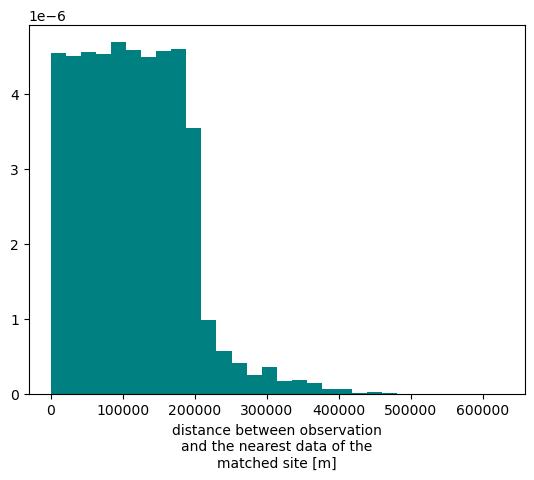

In [20]:
ds_new["cmems___distance"].plot.hist(bins=30, density=True, color="teal")

(array([6.14534019e-04, 5.75635644e-04, 5.60860292e-04, 5.39149571e-04,
        4.99346583e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.03075583e-07, 0.00000000e+00, 0.00000000e+00, 3.01537791e-07,
        3.01537791e-07, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        6.03075583e-07, 9.04613374e-07, 3.01537791e-07, 3.01537791e-07,
        6.03075583e-07, 6.03075583e-07, 3.01537791e-07, 3.01537791e-07,
        9.04613374e-07, 6.03075583e-07]),
 array([    0.        ,   357.63333333,   715.26666667,  1072.9       ,
         1430.53333333,  1788.16666667,  2145.8       ,  2503.43333333,
         2861.06666667,  3218.7       ,  3576.33333333,  3933.96666667,
         4291.6       ,  4649.23333333,  5006.86666667,  5364.5       ,
         5722.13333333,  6079.76666667,  6437.4       ,  6795.03333333,
         7152.66666667,  7510.3       ,  7867.93333333,  8225.56666667,
         8583.2       

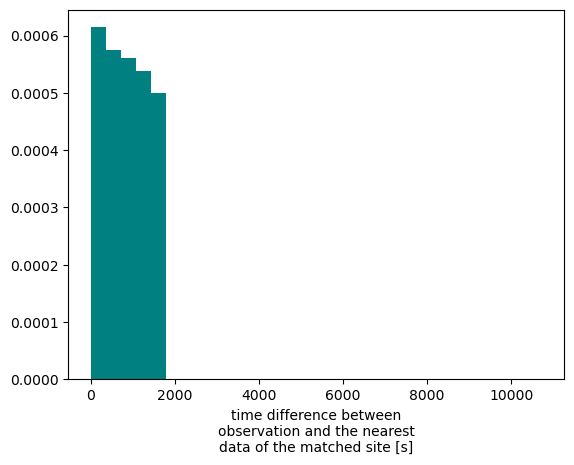

In [21]:
ds_new["cmems___time_difference"].plot.hist(bins=30, density=True, color="teal")

In [10]:
def scatter_hist(
    ds,
    x,
    y,
    axi,
    ax_histx,
    ax_histy,
    color="salmon",
    bins=40,
    x_label=1,
    y_label=1,
    **kwargs,
):
    # no labels
    ax.grid(zorder=0)
    ax_histx.grid(axis="x", zorder=0)
    ax_histy.grid(axis="y", zorder=0)
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ds.plot.scatter(x, y, color=color, ax=axi, zorder=1, marker="+")

    ds[x].plot.hist(
        bins=np.arange(0, 3, 1 / 12), density=True, color=color, ax=ax_histx, zorder=1
    )
    ds[y].plot.hist(
        bins=np.arange(0, 600, 20),
        density=True,
        color=color,
        ax=ax_histy,
        orientation="horizontal",
        zorder=1,
    )
    ax_histx.set_xlabel("")
    ax_histy.set_xlabel("")

    ax_histx.set_title(**kwargs)
    if isinstance(x_label, str):
        ax.set_xlabel(x_label)
        ax_histx.set_ylabel("hist(" + x_label + ")\n")
    if isinstance(y_label, str):
        ax.set_ylabel(y_label)
        ax_histy.set_xlabel("hist(" + y_label + ")\n")

    # ax_histx.set_yscale('log')
    # ax_histy.set_xscale('log')

In [ ]:
# start with a square Figure
fig = plt.figure(figsize=(9, 4))

# Add a gridspec with two rows and two columns and a ratio of 2 to 7 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(
    2,
    2,
    width_ratios=(7, 2),
    height_ratios=(2, 7),
    left=0.1,
    right=0.9,
    bottom=0.1,
    top=0.9,
    wspace=0.05,
    hspace=0.05,
)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# use the previously defined function
scatter_hist(
    ds_new,
    "cmems___time_difference",
    "cmems___distance",
    ax,
    ax_histx,
    ax_histy,
    label="(a) \n Colocalisations with GPS drifters\n",
    y_label=r"$dl$ [km]",
    x_label=r"$dt$ [h]",
)
# fig.suptitle('(a) \n Colocalisations with GPS drifters\n', fontsize=15)
fig.tight_layout(rect=[0, 0, 1, 1])  # left, bottom, right, top (default is 0,0,1,1)
plt.show()

In [31]:
cluster.close()